<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/Module4/Aaron_Huizenga_LS_DS_434_Hyperparameter_Tuning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: [Available Here](https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv)

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [65]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn+(1).csv to WA_Fn-UseC_-Telco-Customer-Churn+(1) (2).csv


In [66]:
# Let the fun begin
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn+(1) (2).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
# Back to basics. I want to drop any unnecessary columns
# 'customerID'

df = df.drop(columns='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
import category_encoders as ce 
import pandas.util.testing as tm

In [69]:
# I will import 'category_encoders' and then one-hot encode the data

one = ce.OneHotEncoder(cols = ['gender',
                               'MultipleLines',
                               'InternetService',
                               'Contract',
                               'PaymentMethod',
                               'OnlineSecurity',
                               'OnlineBackup',
                               'DeviceProtection',
                               'TechSupport',
                               'StreamingTV',
                               'StreamingMovies'],
                       use_cat_names = True)

In [70]:
# Now I will try and fit the model using a transform function

df = one.fit_transform(df)

df.head()

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineSecurity_No internet service,OnlineBackup_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1,0,0,Yes,No,1,No,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,Yes,1,0,0,0,29.85,29.85,No
1,0,1,0,No,No,34,Yes,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,No,0,1,0,0,56.95,1889.5,No
2,0,1,0,No,No,2,Yes,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,Yes,0,1,0,0,53.85,108.15,Yes
3,0,1,0,No,No,45,No,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,No,0,0,1,0,42.30,1840.75,No
4,1,0,0,No,No,2,Yes,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,Yes,1,0,0,0,70.70,151.65,Yes


In [71]:
# Didn't realize it till I got to the bottom, in which you'll see another error
# because I got to excited and forgot to replace the strings as a float, which
# would also explain the string printing out rather than a float. Typically you
# use a df.head() function to check your work, but I will forgoe that and wait 
# until after the latest error.

df = df.replace({"Yes": 1,
                 "No": 0})

In [72]:
# I will start by using a describe function to eventually change the total charges
# to an integer

df['TotalCharges'].describe(exclude='number')

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [73]:
df['TotalCharges'] = df['TotalCharges'].replace({" ":0})

In [74]:
# The following will execute the change

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [75]:
# Lets take a look at both the x and y data

x = df.loc[:, 'PhoneService':'TotalCharges']
x.head()

,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineSecurity_No internet service,OnlineBackup_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,29.85,29.85
1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,56.95,1889.50
2,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,53.85,108.15
3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,42.30,1840.75
4,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,70.70,151.65


In [76]:
# In this case it would typically show a 0 or a 1
# With 0 = No
# and With 1 = Yes
# So I'm not sure why the words themselves are printed out...

y = df['Churn']
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [77]:
x.shape

(7043, 35)

In [78]:
# I got ahead of myself and forgot to split model into x and y. I will leave the 
# error below and just code it in beneath the error.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [18]:
# len(y_train)

NameError: ignored

In [79]:
len(y_train)

5634

In [80]:
# And now the shape for x_train

x_train.shape

(5634, 35)

In [81]:
pd.set_option('display.max_columns', 500)
df.head()

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineSecurity_No internet service,OnlineBackup_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,29.85,29.85,0
1,0,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,1,0,0,0,2,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,53.85,108.15,1
3,0,1,0,0,0,45,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,42.30,1840.75,0
4,1,0,0,0,0,2,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,70.70,151.65,1


In [82]:
# Lets check the dtypes of x_train

x_train.dtypes

PhoneService                                 int64
MultipleLines_No phone service               int64
MultipleLines_No                             int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_Yes                           int64
OnlineSecurity_No internet service           int64
OnlineBackup_Yes                             int64
OnlineBackup_No                              int64
OnlineBackup_No internet service             int64
DeviceProtection_No                          int64
DeviceProtection_Yes                         int64
DeviceProtection_No internet service         int64
TechSupport_No                               int64
TechSupport_Yes                              int64
TechSupport_No internet service              int64
StreamingTV_No                 

In [30]:
# The following function will standardize the data

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

ValueError: ignored

In [83]:
# The following function will standardize the data
# The error should now be fixed, and this function should work properly

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
# No I will set in motion my initial TF (TensorFlow) model.

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This will initialize the shape of the input
inputs = x_train.shape[1]

# This will define the GS parameters
param_grid = {'batch_size': [8, 16, 32, 64, 128],
              'epochs':[100]}

# And now to create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Time to compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Lastly we need to fit the model
results = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 5ms/step - loss: 0.4419 - accuracy: 0.7852 - val_loss: 0.4488 - val_accuracy: 0.7757
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8007 - val_loss: 0.4504 - val_accuracy: 0.7835
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8040 - val_loss: 0.4403 - val_accuracy: 0.7800
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8069 - val_loss: 0.4389 - val_accuracy: 0.7850
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8078 - val_loss: 0.4386 - val_accuracy: 0.7906
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8085 - val_loss: 0.4348 - val_accuracy: 0.7949
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8127 - val_loss: 0.4355 - val_accuracy: 0.7906

In [91]:
# Initially I thought that I would have an accuracy score higher than 74%, so I 
# am going to reduce it to 100 and see if there's any change good or bad.
# So with 100 epochs I had a slight increase(76%).

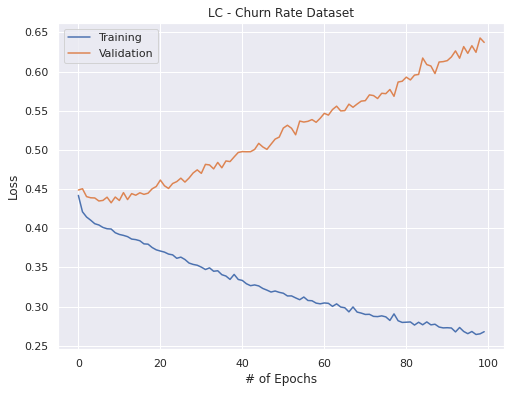

In [92]:
# I will try and graph this since I didn't do a graph yesterday.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

epochs = 100
plt.figure(figsize=(8, 6))
plt.plot(results.history['loss'], label='Training')
plt.plot(results.history['val_loss'], label='Validation')
plt.title('LC - Churn Rate Dataset')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend();

## We will set the model up by tuning my Hyperparameters

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [94]:
y_train2 = np.array(y_train)
y_train2[:5]

array([0, 0, 0, 0, 0])

In [95]:
# Lets check the shape

y_train2.shape

(5634,)

In [97]:
# This cell will use the batch size and do a grid search

seed = 7
np.random.seed(seed)

# shape of input
inputs = x_train.shape[1]

# This function is used to create a new model, which will be needed with the KR
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Time to compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose = 0)

# This will define the GS parameters(Changing up number of epochs)
param_grid = {'batch_size': [8, 16, 32, 64, 128],
              'epochs':[75]}

# This function will create the GS(grid search)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# This function will report the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7790169000625611 using {'batch_size': 128, 'epochs': 75}
Means: 0.7678383469581604, Stdev: 0.004208961634430376 with: {'batch_size': 8, 'epochs': 75}
Means: 0.7687220335006714, Stdev: 0.011352818102566359 with: {'batch_size': 16, 'epochs': 75}
Means: 0.767481529712677, Stdev: 0.008198656888979113 with: {'batch_size': 32, 'epochs': 75}
Means: 0.7756458878517151, Stdev: 0.008534689244264386 with: {'batch_size': 64, 'epochs': 75}
Means: 0.7790169000625611, Stdev: 0.010911536136757313 with: {'batch_size': 128, 'epochs': 75}


In [110]:
# Now we can start testing the learning rate
from tensorflow.keras.optimizers import Adam

# I will use the same seed function as above for this cell
seed = 7
np.random.seed(seed)

# shape of input
inputs = x_train.shape[1]

# same as above in creating model for the KR
def create_model(lr=0.001):
  opt = Adam(learning_rate=lr)

  # create the model
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(inputs,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Time to compile
  model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model


# Model time
model = KerasClassifier(build_fn=create_model, verbose=0)

# define GS params(I am going to change up the # of epochs and run until I'm happy)
param_grid = {'lr': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25],
              'batch_size': [64, 128, 256],
              'epochs': [50]}

# GS(grid search)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# This function is the same as the previous in reporting results from GS
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8010255336761475 using {'batch_size': 64, 'epochs': 50, 'lr': 0.0001}
Means: 0.8010255336761475, Stdev: 0.014459663730787782 with: {'batch_size': 64, 'epochs': 50, 'lr': 0.0001}
Means: 0.7777743339538574, Stdev: 0.018987973484668973 with: {'batch_size': 64, 'epochs': 50, 'lr': 0.001}
Means: 0.7728039741516113, Stdev: 0.01315213494400394 with: {'batch_size': 64, 'epochs': 50, 'lr': 0.01}
Means: 0.7901996970176697, Stdev: 0.021112416961426406 with: {'batch_size': 64, 'epochs': 50, 'lr': 0.05}
Means: 0.7499113440513611, Stdev: 0.020613337266375188 with: {'batch_size': 64, 'epochs': 50, 'lr': 0.1}
Means: 0.7346473813056946, Stdev: 0.011082224181538 with: {'batch_size': 64, 'epochs': 50, 'lr': 0.25}
Means: 0.8008490085601807, Stdev: 0.01825906261222901 with: {'batch_size': 128, 'epochs': 50, 'lr': 0.0001}
Means: 0.7839880466461182, Stdev: 0.012107638426829373 with: {'batch_size': 128, 'epochs': 50, 'lr': 0.001}
Means: 0.7708547353744507, Stdev: 0.0071326411977543965 with: {'batch_si

In [ ]:
# So I changed up the 2nd search to only search for 50 epochs and the best results
# came back at just over 80%. So now I want to see what 25 epochs will do.. Not 
# entirely happy with it coming in at just under 80%, so before I bump it up, I
# I want to try one more at 20 epochs and see what happens... I wasn't expecting 
# a result of 80.01% with 20 epochs... Back to 50 with 80.1% so not much different
# than that of 20 epochs

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?